# An introduction to Tensorflow and PyTorch

This notebook is based on the deep learning course and lab provided on the http://introtodeeplearning.com/

In [11]:
#importing necessary libraries.

import tensorflow as tf  #tensorflow
import torch  #PyTorch
from torch import nn #neural network

import numpy as np #numerical computation
import matplotlib.pyplot as plt #for visualization

In [2]:
#checking the versions
tf.__version__, torch.__version__, np.__version__

('2.10.0', '1.12.1+cpu', '1.21.0')

Examples, working with Tensors

In [14]:
#creating tensors in Tensorflow
sport = tf.constant("Soccer", tf.string) # a string
number = tf.constant(1.41421356237, tf.float64) # a float
#rank is the number of dimensions of the tensor, shape represents the size of each dimension.
print(f"Tensorflow\nrank: {tf.rank(sport).numpy()}\nshape: {tf.shape(sport)}")
#*********************************
#*********************************

#PyTorch equivalent

# can't make a string tensor in pytorch
number = torch.tensor(1.143254, dtype = torch.float64)
#dimension only available for 2d
print(f"shape: {number.numpy().shape}")

Tensorflow
rank: 0
shape: []
shape: ()


In [15]:
#Tensorflow
#a random matrix in numpy
matrix_tf = np.random.random(size=(10,2))
#convert it to tensor
matrix_tf = tf.convert_to_tensor(matrix_tf)

#checking
assert isinstance(matrix_tf, tf.Tensor)
assert tf.rank(matrix_tf).numpy() == 2
#***************************

#PyTorch
#a random matrix in numpy
matrixx = np.random.random(size=(10,2))
#convert it to tensor
matrix_pt = torch.as_tensor(matrixx)
#using from_numpy method
matrix_ = torch.from_numpy(matrixx)

#checking
assert isinstance(matrix_pt, torch.Tensor)
assert torch.matrix_rank(matrix_pt).numpy() == 2

In [16]:
#using tensorflow to create matrix of random numbers
mat = tf.random.normal([10,2], dtype= tf.float64)
assert isinstance(mat, tf.Tensor)

#******************
# PyTorch
mat = torch.normal(0,1,size=(10, 2), dtype= torch.float64)
assert isinstance(mat, torch.Tensor)

In [7]:
matrix_tf[1].numpy()

array([0.63426526, 0.67673623])

In [17]:
matrix_pt[1].numpy()

array([0.56662294, 0.05679811])

In [18]:
#TensorFlow
#creating constant tensors
a = tf.constant(5)
b = tf.constant(9)
#addition operation using tensorflow.
c = tf.add(a,b)
#normal addition
c2 = a+b
print(c, c2)

#***************
#PyTorch
a = torch.tensor(5)
b = torch.tensor(9)

c = torch.add(a,b)
c2 = a+b
print(c, c2)

tf.Tensor(14, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tensor(14) tensor(14)


In [19]:
#TensorFlow
#a custom function
def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)

  return e

a, b = 1.5, 2.5

e_out = func(a,b)
print(e_out.numpy())
#***************************
#PyTorch
def func(a,b):
  c = torch.add(a,b)
  d = torch.subtract(b,1)
  e = torch.multiply(c,d)

  return e

a, b = 1.5, 2.5

e_out = func(a,b)
print(e_out.numpy())

6.0
6.0


# Neural Networks in TensorFlow/PyTorch

## TensorFlow

In [20]:
#Tensorflow
# a simple perceptron; y = sigmoid_function(Wx + b)
# Defining a network layer

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class DenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(DenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) 

  def call(self, x):
    z = tf.matmul(x, self.W)
    z = tf.add(z, self.b)

    y = tf.sigmoid(z)

    return y

#fixing the seed
tf.random.set_seed(1)
#creating an instance of our denselayer
layer = DenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())

[[0.8964527  0.44808388 0.25748628]]


## PyTorch

In [23]:
#PyTorch implementation of the previous cell
class DenseLayer(nn.Module):
  def __init__(self, n_output_nodes):
    super(DenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])

    self.W = torch.nn.Parameter(torch.empty((d, self.n_output_nodes)))
    self.b = torch.nn.Parameter(torch.empty((1, self.n_output_nodes)))

  def call(self, x):
    z = torch.matmul(x, self.W)
    z = torch.add(z, self.b)

    y = torch.sigmoid(z)

    return y

torch.manual_seed(1)
layer = DenseLayer(3)
layer.build((1,2))
x_input = torch.tensor([[1.0,2.0]])
y = layer.call(x_input)

print(y.detach().numpy())

[[1.         0.50000036 1.        ]]


## Tensorflow

In [33]:
#Defining a neural network using the sequential API
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

#first define the model
model = Sequential()
#layer
dense_layer = Dense(n_output_nodes, activation="sigmoid")
model.add(dense_layer)

# Test model with example input
tf.random.set_seed(1)
x_input = tf.constant([[1,2.]], shape=(1,2))
model_output  = model(x_input)
print(model.summary())
print(model_output)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (1, 3)                    9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor([[0.11041237 0.08901978 0.23369594]], shape=(1, 3), dtype=float32)


## PyTorch

In [35]:
#PyTorch implementation of the previous cell

densenet = nn.Sequential(nn.Linear(2,3), nn.Sigmoid())
x_input_pt = torch.tensor([[1.0,2.0]], dtype=torch.float32)
model_pt = densenet(x_input_pt)
print(densenet)
print(model_pt)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Sigmoid()
)
tensor([[0.6314, 0.1824, 0.5708]], grad_fn=<SigmoidBackward0>)


## TensorFlow

In [38]:
#Defining a model using subclassing 

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

  def call(self, inputs):
    return self.dense_layer(inputs)

n_output_nodes = 3
model = SubclassModel(n_output_nodes)
x_input = tf.constant([[1.0, 2.0]], shape=(1,2))
print(model.call(x_input))

tf.Tensor([[0.69637954 0.524717   0.22774373]], shape=(1, 3), dtype=float32)


## PyTorch

In [39]:
#PyTorch implementation of the previous cell

#Defining a model using subclassing 

class SubclassModel(nn.Module):
  def __init__(self, input_features, n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = nn.Linear(in_features= input_features, out_features = n_output_nodes)

  def call(self, inputs):
    res =  self.dense_layer(inputs)
    return torch.sigmoid(res)


n_output_nodes = 3
input_features = 2
model = SubclassModel(input_features, n_output_nodes)
x_input = torch.tensor([[1.0,2.0]])
print(model.call(x_input))

tensor([[0.5340, 0.2857, 0.3189]], grad_fn=<SigmoidBackward0>)


## TensorFlow

In [40]:
#defining a model using subclassing and specifying custom behaviour

class IdentityModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation = "sigmoid")

  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    else:
      return x


n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(inputs = x_input, isidentity=False)
out_identity = model.call(inputs = x_input, isidentity=True)

print(f"activate: {out_activate.numpy()}\n identity: {out_identity.numpy()}")

activate: [[0.9436917  0.50894916 0.7811435 ]]
 identity: [[1. 2.]]


## PyTorch

In [41]:
#defining a model using subclassing and specifying custom behaviour

class IdentityModel(nn.Module):
  def __init__(self, input_features, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = nn.Linear(in_features= input_features, out_features = n_output_nodes)

  def call(self, inputs, isidentity=False):
    x = torch.sigmoid(self.dense_layer(inputs))
    if isidentity:
      return inputs
    else:
      return x


n_output_nodes = 3
input_features = 2
model = IdentityModel(input_features, n_output_nodes)

x_input = torch.tensor([[1.0,2.0]])

out_activate = model.call(inputs = x_input, isidentity=False)
out_identity = model.call(inputs = x_input, isidentity=True)

print(f"activate: {out_activate.detach().numpy()}\n identity: {out_identity.detach().numpy()}")

activate: [[0.45601484 0.46763867 0.6969129 ]]
 identity: [[1. 2.]]


# Automatic Differentiation

In [42]:
#TensorFlow
# Gradient computation with GradientTape

#y = x^2
# example x=3.0
x = tf.Variable(3.0)

#initiate the gradient tape
with tf.GradientTape() as tape:
  y = x*x

dy_dx = tape.gradient(y,x)
#checking
assert dy_dx.numpy() == 6.0

#***************
#PyTorch

#y = x^2
# example x=3.0
x = torch.tensor(3.0, requires_grad=True)

#equation
y = x*x

y.backward()

dy_dx = x.grad
#checking
assert dy_dx.detach().numpy() == 6.0

In [43]:
#result of the equation
print("Result of the equation", y.detach().numpy())

#Derative result
print("Derative result",x.grad.detach().numpy())

Result of the equation 9.0
Derative result 6.0


## Tensorflow

Initializing x = [[0.40308788]]


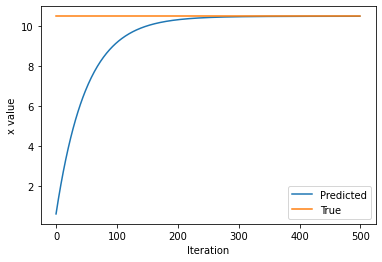

In [46]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x = {}".format(x.numpy()))

learning_rate = 1e-2
history = []
x_f = 10.5

for i in range(500):
  with tf.GradientTape() as tape:
    l = tf.subtract(x, x_f)
    loss = tf.pow(l, 2)

  grad = tape.gradient(loss, x)
  new_x = x - learning_rate*grad
  x.assign(new_x)
  history.append(x.numpy()[0])


plt.plot(history)
plt.plot([0,500],[x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

In [48]:
history[-2:]

[array([10.4995775], dtype=float32), array([10.499586], dtype=float32)]

## PyTorch

Initializing x = [-0.1132018]


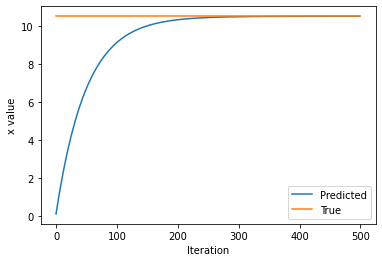

In [49]:
x = torch.randn(1, requires_grad=True, dtype= torch.float64)
print("Initializing x = {}".format(x.detach().numpy()))

learning_rate = 1e-2
history = []
x_f = torch.tensor(10.5, dtype= torch.float64)

for i in range(500):
  loss = (x - x_f).pow(2).sum()#.clone().detach().requires_grad_(True)
  loss.backward()

  with torch.no_grad():
      x.copy_(x - learning_rate*x.grad)
      #x.data = new_x.data
  x.grad.zero_()
  history.append(x.detach().numpy()[0])


plt.plot(history)
plt.plot([0,500],[x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

In [50]:
history[-2:]

[10.499555718537657, 10.499564604166904]